# Class 28 - Maximum Flow

Define an adjacency matrix for a simple directed graph with six vertices, as shown here:

In [1]:
import numpy
vertex_names = ["A","B","C","D","E","X"]
N = len(vertex_names)
network = numpy.zeros([N, N])
network[0,5] = 1
network[0,4] = 1
network[3,4] = 1
network[0,1] = 1
network[0,2] = 1
network[2,5] = 1
network[4,5] = 1

Make an igraph graph out of this adjacency matrix, and print the graph and its summary:

IGRAPH DN-- 6 7 -- 
+ attr: label (v), name (v)


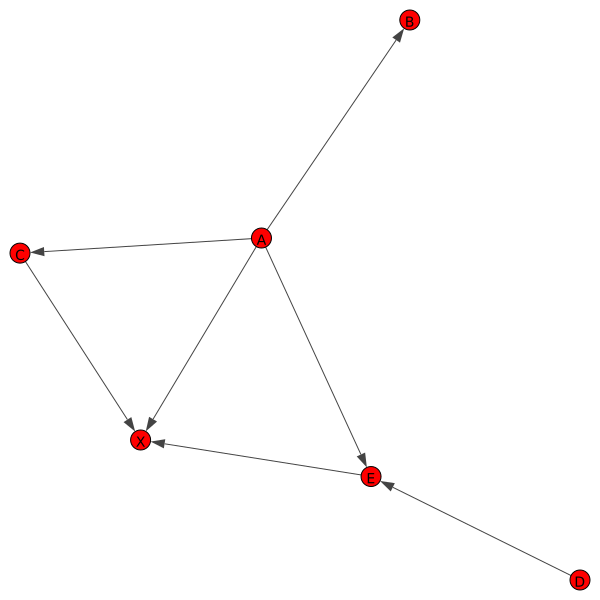

In [2]:
import igraph

graph = igraph.Graph(directed=True)

for i in range(6):
    graph.add_vertex(i, label=vertex_names[i])
    
for i in range(len(network)):
    for j in range(len(network[i])):
        if network[i][j]:
            graph.add_edge(i, j)
            
print(graph.summary())

igraph.drawing.plot(graph)

Using the `Graph.maxflow` function, compute the max-flow between all possible pairs of distinct vertices. Which pair of vertices have the maximum flow between them? 

In [3]:
maxflow = 0
vertices = None

for first in graph.vs:
    for second in graph.vs:
        if first == second:
            continue
            
        flow = graph.maxflow(first["name"], second["name"])
        if flow.value > maxflow:
            maxflow = flow.value
            vertices = (first["label"], second["label"])
            
print("Maximum flow:", maxflow)
print("Between vertices:", vertices)

Maximum flow: 3.0
Between vertices: ('A', 'X')
